## Observations and Insights


In [ ]:
# 1 - Capomulin and Ramicane have the lowest mean tumor size, final result, and varience amoung the drug regimens. 
# 2 - Capomulin and Ramicane also had the most datapoints taken over 45 days, showing more mice made it through the trial. 
# 3 - Weight and the Size of tumor have a direct correlation of .93 - which is a very high correlation. 

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, left_on='Mouse ID', right_on = 'Mouse ID')
#Replace spaces in column names with _
merged_df.columns = merged_df.columns.str.replace(' ', '_')
merged_df.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumor_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = merged_df.groupby('Drug_Regimen')

regimen_df = pd.DataFrame({
            'Total Trials': regimen_group['Mouse_ID'].count(),
            'Mean': regimen_group['Tumor_Volume_(mm3)'].mean(),
            'Median': regimen_group['Tumor_Volume_(mm3)'].median(),
            'Variance': regimen_group['Tumor_Volume_(mm3)'].var(),
            'Standard_Dev': regimen_group['Tumor_Volume_(mm3)'].std(),
            'SEM': regimen_group['Tumor_Volume_(mm3)'].sem()
            })

regimen_df

,Total Trials,Mean,Median,Variance,Standard_Dev,SEM
Drug_Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,161,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

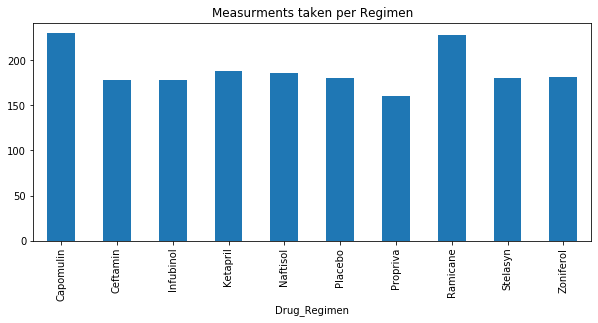

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_counts_df = pd.DataFrame({
            'Count of Drug Regimen': regimen_group['Mouse_ID'].count()
            })


regimen_counts_df.plot(kind='bar', 
                       title='Measurments taken per Regimen',
                       legend=False, 
                       figsize = (10,4)
                      )
plt.show()

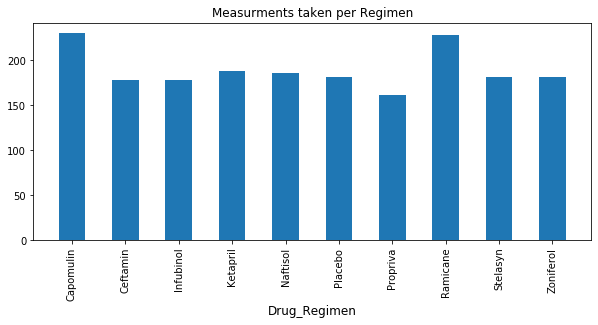

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
regimen_counts = regimen_group['Mouse_ID'].count()
x_axis = np.arange(len(regimen_counts))
regimen_ticks = [value for value in x_axis]

fig = plt.figure(figsize = (10,4))
plt.title("Measurments taken per Regimen", fontsize=12)
plt.xlabel("Drug_Regimen", fontsize=12)

plt.bar(x_axis,regimen_counts, width = .5)
plt.xticks(regimen_ticks, regimen_counts.index.values, fontsize=10, rotation=90)
plt.show()

## Pie plots

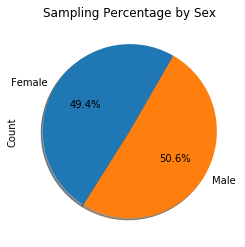

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = merged_df.groupby('Sex')

gender_group_df = pd.DataFrame({
            'Count': gender_group['Mouse_ID'].count()
            })

gender_group_df.plot(y='Count', 
                     kind='pie', 
                     autopct='%1.1f%%', 
                     shadow=True, 
                     startangle=60,
                     title='Sampling Percentage by Sex', 
                     legend=False)
plt.show()

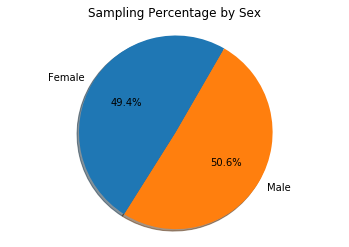

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = pd.DataFrame(merged_df.groupby('Sex').count()).reset_index()

plt.title("Sampling Percentage by Sex", fontsize=12)
plt.pie(gender_counts['Mouse_ID'], 
        autopct="%1.1f%%", 
        labels=gender_counts['Sex'],
        shadow=True, 
        startangle=60)
plt.axis('equal')

plt.show()

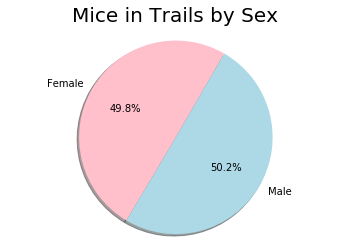

In [9]:
# Added this because I was not sure if you wanted the breakdown by mice in the trail or how many were
# in the sampling. Need to better define and ask questions
gender_counts = pd.DataFrame(mouse_metadata.groupby('Sex').count()).reset_index()
colors = ["pink","lightblue"]

plt.title("Mice in Trails by Sex", fontsize=20)
plt.pie(gender_counts['Mouse ID'], 
        autopct="%1.1f%%", 
        labels=gender_counts['Sex'],
        colors=colors, 
        shadow=True, 
        startangle=60)
plt.axis('equal')

plt.show()

## Quartiles, outliers and boxplots

In [10]:
#This section is to set up to display the results in the next secion

#Create Dataframe with only the listed as the most promising drugs
Promising_Regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Promising_Regimens_df = merged_df[merged_df["Drug_Regimen"].isin(Promising_Regimens)]

#Creates a new clean dataframe with only columns wanted for analysis
Promising_Regimens_clean_df = Promising_Regimens_df[["Drug_Regimen", "Mouse_ID", "Timepoint", "Tumor_Volume_(mm3)"]]

In [11]:
# Part 1
# 
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# Create Sorted dataframe in descending order by timepoint
Promising_Regimens_clean_sorted = Promising_Regimens_clean_df.sort_values("Timepoint", ascending=False)

# Remove values in dataframe and only keep the first listed Mouse_ID
Promising_Regimens_last_result = Promising_Regimens_clean_sorted.drop_duplicates(subset ="Mouse_ID", keep='first' )

#Display results
Promising_Regimens_last_result

,Drug_Regimen,Mouse_ID,Timepoint,Tumor_Volume_(mm3)
1872,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098
...,...,...,...,...
1205,Infubinol,m756,5,47.010364
1743,Ceftamin,x226,0,45.000000
594,Ceftamin,b447,0,45.000000
1551,Ceftamin,t573,0,45.000000


In [12]:
# Part 2
# 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Final_Tumor_Results = Promising_Regimens_last_result['Tumor_Volume_(mm3)']

quartiles = Final_Tumor_Results.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of the final tumor volume is: {lowerq}")
print(f"The upper quartile of the final tumor volume is: {upperq}")
print(f"The interquartile range of the final tumor volume is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

lower_outliers = Final_Tumor_Results[Final_Tumor_Results < lower_bound].count()
upper_outliers = Final_Tumor_Results[Final_Tumor_Results > upper_bound].count()
total_outliers = lower_outliers + upper_outliers

print(f"There are {lower_bound} lower limit.")
print(f"There are {upper_bound} upper limit.")
print(f"There are {total_outliers} outliers in the dataset.")

The lower quartile of the final tumor volume is: 37.187743802499995
The upper quartile of the final tumor volume is: 59.930261755000004
The interquartile range of the final tumor volume is: 22.74251795250001
There are 3.0739668737499812 lower limit.
There are 94.04403868375002 upper limit.
There are 0 outliers in the dataset.


In [14]:
#Create dataframe of each Drug Regimen for anlaysis
inf_df = Promising_Regimens_last_result.loc[Promising_Regimens_last_result["Drug_Regimen"] == "Infubinol"]["Tumor_Volume_(mm3)"]
cap_df = Promising_Regimens_last_result.loc[Promising_Regimens_last_result["Drug_Regimen"] == "Capomulin"]["Tumor_Volume_(mm3)"]
ram_df = Promising_Regimens_last_result.loc[Promising_Regimens_last_result["Drug_Regimen"] == "Ramicane"]["Tumor_Volume_(mm3)"]
cef_df = Promising_Regimens_last_result.loc[Promising_Regimens_last_result["Drug_Regimen"] == "Ceftamin"]["Tumor_Volume_(mm3)"]

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_inf = inf_df.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

print(f"The lower quartile of the Infubinol trials is: {lowerq_inf}")
print(f"The upper quartile of the Infubinol trials is: {upperq_inf}")
print(f"The interquartile range of the Infubinol trials is: {iqr_inf}")

lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)

lower_outliers_inf = inf_df[inf_df < lower_bound_inf].count()
upper_outliers_inf = inf_df[inf_df > upper_bound_inf].count()
total_outliers_inf = lower_outliers_inf + upper_outliers_inf

print(f"There are {total_outliers_inf} outliers in the Infubinol trials.")

The lower quartile of the Infubinol trials is: 54.04860769
The upper quartile of the Infubinol trials is: 65.52574285
The interquartile range of the Infubinol trials is: 11.477135160000003
There are 1 outliers in the Infubinol trials.


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_cap = cap_df.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

print(f"The lower quartile of the Capomulin trials is: {lowerq_cap}")
print(f"The upper quartile of the Capomulin trials is: {upperq_cap}")
print(f"The interquartile range of the Capomulin trials is: {iqr_cap}")

lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)

lower_outliers_cap = cap_df[cap_df < lower_bound_cap].count()
upper_outliers_cap = cap_df[cap_df > upper_bound_cap].count()
total_outliers_cap = lower_outliers_cap + upper_outliers_cap

print(f"There are {total_outliers_cap} outliers in the Capomulin trials.")

The lower quartile of the Capomulin trials is: 32.37735684
The upper quartile of the Capomulin trials is: 40.1592203
The interquartile range of the Capomulin trials is: 7.781863460000004
There are 0 outliers in the Capomulin trials.


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_ram = ram_df.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

print(f"The lower quartile of the Ramicane trials is: {lowerq_ram}")
print(f"The upper quartile of the Ramicane trials is: {upperq_ram}")
print(f"The interquartile range of the Ramicane trials is: {iqr_ram}")

lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)

lower_outliers_ram = ram_df[ram_df < lower_bound_ram].count()
upper_outliers_ram = ram_df[ram_df > upper_bound_ram].count()
total_outliers_ram = lower_outliers_ram + upper_outliers_ram

print(f"There are {total_outliers_ram} outliers in the Ramicane trials.")

The lower quartile of the Ramicane trials is: 31.56046955
The upper quartile of the Ramicane trials is: 40.65900627
The interquartile range of the Ramicane trials is: 9.098536719999998
There are 0 outliers in the Ramicane trials.


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_cef = cef_df.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

print(f"The lower quartile of the Ceftamin trials is: {lowerq_cef}")
print(f"The upper quartile of the Ceftamin trials is: {upperq_cef}")
print(f"The interquartile range of the Ceftamin trials is: {iqr_cef}")

lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)

lower_outliers_cef = cef_df[cef_df < lower_bound_cef].count()
upper_outliers_cef = cef_df[cef_df > upper_bound_cef].count()
total_outliers_cef = lower_outliers_cef + upper_outliers_cef

print(f"There are {total_outliers_cef} outliers in the Ceftamin trials.")

The lower quartile of the Ceftamin trials is: 48.72207785
The upper quartile of the Ceftamin trials is: 64.29983003
The interquartile range of the Ceftamin trials is: 15.577752179999997
There are 0 outliers in the Ceftamin trials.


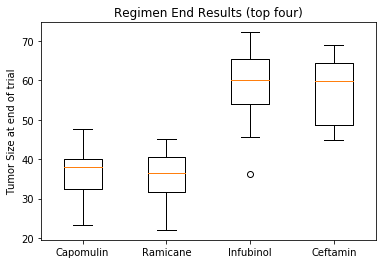

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Regimen End Results (top four)')
ax1.set_ylabel('Tumor Size at end of trial')
plt.boxplot([cap_df,ram_df,inf_df,cef_df], labels =Promising_Regimens)
plt.show() 


## Line and scatter plots

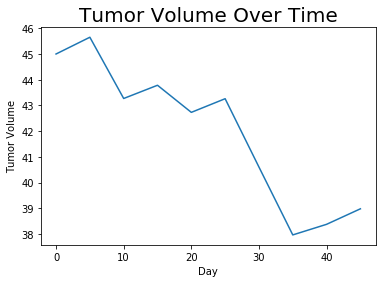

In [20]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Looked at excel to determine a mouse that had all data points and was part of the Cap trial
Mouse_Num = ["b128"]
Mouse_Trial_Result = Promising_Regimens_clean_sorted[Promising_Regimens_clean_sorted["Mouse_ID"].isin(Mouse_Num)]

plt.title("Tumor Volume Over Time", fontsize=20)
plt.xlabel("Day", fontsize=10)
plt.ylabel("Tumor Volume", fontsize=10)

plt.plot(Mouse_Trial_Result["Timepoint"],Mouse_Trial_Result["Tumor_Volume_(mm3)"])

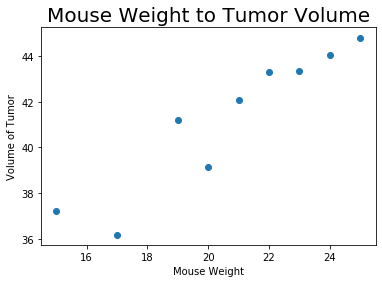

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Weight_Vol_Trial_Drug = ["Capomulin"]
Weight_Vol_Trial_Result = merged_df[merged_df["Drug_Regimen"].isin(Weight_Vol_Trial_Drug)]

#Weight_Trial = Weight_Vol_Trial_Result.Weight_(g).unique()
Weight_Trial = merged_df.loc[merged_df["Drug_Regimen"] == "Capomulin"]["Weight_(g)"].unique()


#Average Turmor Volume
Avg_Turmor_Trial = Weight_Vol_Trial_Result.groupby(Weight_Vol_Trial_Result["Weight_(g)"])["Tumor_Volume_(mm3)"].mean()


plt.title("Mouse Weight to Tumor Volume", fontsize=20)
plt.xlabel("Mouse Weight", fontsize=10)
plt.ylabel("Volume of Tumor", fontsize=10)
plt.scatter(Weight_Trial,Avg_Turmor_Trial)

plt.show()



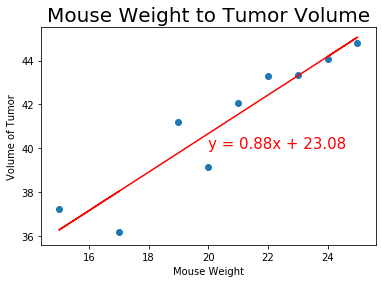

The correlation between Mouse Weight and Tumor Volume is 0.93


In [22]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Weight_Trial,Avg_Turmor_Trial)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Weight_Trial, Avg_Turmor_Trial)
regress_values = Weight_Trial * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Mouse Weight to Tumor Volume", fontsize=20)
plt.xlabel("Mouse Weight", fontsize=10)
plt.ylabel("Volume of Tumor", fontsize=10)
plt.plot(Weight_Trial,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.scatter(Weight_Trial,Avg_Turmor_Trial)

plt.show()
print(f"The correlation between Mouse Weight and Tumor Volume is {round(correlation[0],2)}")
